# Part I


## A: Architecture of VGG16 and ResNet50

### VGG16
Vgg16 is a convolutional neural network with a specific configuration. The model has 16 layers and a total of 138 million parameters. Even though the model is really large, the simplicity of it is the main key.

![vgg16 architecture](https://datagen.tech/wp-content/uploads/2022/11/image2-1.png)

The model consists of following layers:

![vgg16](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16-1024x450.jpg)

1. Input layer with shape $(224, 224, 3)$
2. 13 Convolution layers with 5 max pooling in between them.
3. 3 fully connected hidden layer

The output shape is $(1, 1, 1000)$.

### ResNet50
#### Problem with deep neural network
Deeper neural network are more difficult to train for several reasons:

1. **Vanishing Gradient Problem**: As a neural network gets deeper, the gradients used in backpropagation can become very small, making it difficult for the model to learn effectively. This can lead to slower convergence and the model getting stuck in a suboptimal solution.

2. **Overfitting**: Deeper networks have more parameters to be learned, which can lead to overfitting. Overfitting occurs when the model performs well on the training data but poorly on unseen test data.

3. **More data**: Deeper networks generally require more data to train effectively. With a small dataset, deep networks may overfit or fail to generalize.

4. **Computationally expensive**: Deeper networks require more computational resources and time to train. This can make it difficult to experiment with different architectures or hyperparameters.

The ResNet50 architecture is a convolutional neural network with 50 layers (48 convolutional layers, 1 max pooling layer and 1 average pooling layer). It provides a way to add more convolutional layers to a network, without running into the vanishing gradient problem. It skips over some layers, causing to have a residual network rather than a regular network.

![residual block](https://www.researchgate.net/publication/358788354/figure/fig3/AS:1182277186924565@1658888255303/Residual-learning-a-building-block.png)

![resnet50 architecture](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/resnet_architecture.png)

## B: Coding

### Fetching the dataset

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')

data_dir = '/content/drive/My Drive/810101476-KouroshAlinaghi-P1/dataset'
classes = ['Carcinoma', 'Melanoma', 'Nevus']

X = []
y = []

for class_index, class_name in enumerate(classes):
    path = os.path.join(data_dir, class_name)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.resize(img_array, (224, 224))
        X.append(img_array)
        y.append(class_index)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Writing a function to plot the results:

In [ ]:
def plot(a_train_accuracy, a_test_accuracy, b_train_accuracy, b_test_accuracy):
    epochs = range(1, len(resnet_train_accuracy) + 1)

    plt.plot(epochs, a_train_accuracy, 'b', label='ResNet50 Training accuracy')
    plt.plot(epochs, a_test_accuracy, 'b--', label='ResNet50 Validation accuracy')
    plt.plot(epochs, b_train_accuracy, 'r', label='VGG16 Training accuracy')
    plt.plot(epochs, b_test_accuracy, 'r--', label='VGG16 Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

### Building and training the models without agumentation

In [ ]:
def get_model(initial_model):
    model = tf.keras.models.Sequential()
    model.add(initial_model)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.9))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    return model

def run_and_train(model):
    num_of_epochs = 10
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=num_of_epochs, validation_data=(X_test, y_test))
    train_accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']
    accuracy = model.evaluate(X_test, y_test)[1]
    return (train_accuracy, test_accuracy, accuracy)

Epoch 1/10
3/3 [==============================] - 11s 2s/step - loss: 18.9867 - accuracy: 0.2907 - val_loss: 10.1910 - val_accuracy: 0.3793
Epoch 2/10
3/3 [==============================] - 1s 239ms/step - loss: 8.2816 - accuracy: 0.5233 - val_loss: 3.6470 - val_accuracy: 0.4828
Epoch 3/10
3/3 [==============================] - 1s 251ms/step - loss: 1.5186 - accuracy: 0.6977 - val_loss: 1.3416 - val_accuracy: 0.4138
Epoch 4/10
3/3 [==============================] - 1s 275ms/step - loss: 0.4709 - accuracy: 0.8372 - val_loss: 0.6169 - val_accuracy: 0.7241
Epoch 5/10
3/3 [==============================] - 1s 275ms/step - loss: 0.4191 - accuracy: 0.9186 - val_loss: 0.6151 - val_accuracy: 0.8046
Epoch 6/10
3/3 [==============================] - 1s 237ms/step - loss: 0.2480 - accuracy: 0.8837 - val_loss: 0.8400 - val_accuracy: 0.7701
Epoch 7/10
3/3 [==============================] - 1s 238ms/step - loss: 0.1471 - accuracy: 0.9419 - val_loss: 0.8606 - val_accuracy: 0.8046
Epoch 8/10
3/3 [====

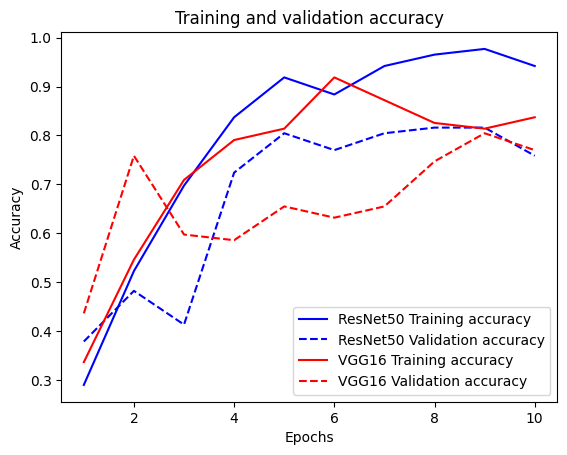

In [ ]:
datagen = ImageDataGenerator()

datagen.fit(X_train)

resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet_model.layers:
    layer.trainable = False

model = get_model(resnet_model)
(resnet_train_accuracy, resnet_test_accuracy, resnet_accuracy) = run_and_train(model)

vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg_model.layers:
    layer.trainable = False

model = get_model(vgg_model)
(vgg16_train_accuracy, vgg16_test_accuracy, vgg_accuracy) = run_and_train(model)

print("ResNet50 Model Accuracy: ", resnet_accuracy)
print("VGG16 Model Accuracy: ", vgg_accuracy)

plot(resnet_train_accuracy, resnet_test_accuracy, vgg16_train_accuracy, vgg16_test_accuracy)

### Building and training the models with agumentation

Epoch 1/10
3/3 [==============================] - 10s 1s/step - loss: 6.1220 - accuracy: 0.4070 - val_loss: 7.2551 - val_accuracy: 0.6437
Epoch 2/10
3/3 [==============================] - 1s 418ms/step - loss: 5.8238 - accuracy: 0.6279 - val_loss: 4.9868 - val_accuracy: 0.5632
Epoch 3/10
3/3 [==============================] - 1s 486ms/step - loss: 4.8219 - accuracy: 0.7093 - val_loss: 4.0165 - val_accuracy: 0.7356
Epoch 4/10
3/3 [==============================] - 1s 409ms/step - loss: 3.8206 - accuracy: 0.7558 - val_loss: 8.1305 - val_accuracy: 0.6897
Epoch 5/10
3/3 [==============================] - 1s 455ms/step - loss: 5.2125 - accuracy: 0.7326 - val_loss: 3.6292 - val_accuracy: 0.7816
Epoch 6/10
3/3 [==============================] - 1s 538ms/step - loss: 4.2565 - accuracy: 0.6977 - val_loss: 3.7463 - val_accuracy: 0.5977
Epoch 7/10
3/3 [==============================] - 2s 768ms/step - loss: 4.4996 - accuracy: 0.6977 - val_loss: 2.9154 - val_accuracy: 0.6437
Epoch 8/10
3/3 [======

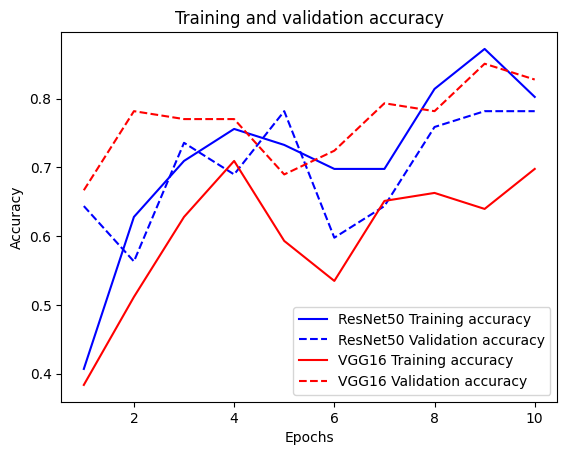

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X_train)

resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in resnet_model.layers:
    layer.trainable = False

model = get_model(resnet_model)
(resnet_train_accuracy, resnet_test_accuracy, resnet_accuracy) = run_and_train(model)

vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in vgg_model.layers:
    layer.trainable = False

model = get_model(vgg_model)
(vgg16_train_accuracy, vgg16_test_accuracy, vgg_accuracy) = run_and_train(model)

print("ResNet50 Model Accuracy: ", resnet_accuracy)
print("VGG16 Model Accuracy: ", vgg_accuracy)

plot(resnet_train_accuracy, resnet_test_accuracy, vgg16_train_accuracy, vgg16_test_accuracy)

### Result

| - | VGG16 | ResNet50 |
| - | ----- | -------- |
| With Augmentation | 82% | 78% |
| Without Augmentation | 77% | 75% |

As it can be seen, the accuracy on ResNet50 model increased significantly when augmentation is used. but the result for VGG16 didn't change a lot which I suppose is because of the small size of our dataset.

### C: Data augmentation
Consider the following images of a lion:

![data augmentation](https://qph.cf2.quoracdn.net/main-qimg-7565e09ecc4a93604b9c26c8c2a89bf9-pjlq)

If somebody asks you what is in the below images, you're going to say it's a lion. Because these are images of a lion. That is what our model also should be enable to do. Data augmentation is a technique that can be used to generate synthetic samples. In data augmentation, these transformations can be used.

1. **Geometric Transformations**:
  1. Rotation
  2. Flipping
  3. Cropping
  4. Translation
  5. Scaling

  ![geometric transformations](https://www.labellerr.com/blog/content/images/2022/11/data-augmentation-1.webp)

2. **Color Space Transformations**:
  1. Brightness Adjustment
  2. Contrast Adjustment
  3. Saturation Adjustment

  ![color space transformation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/627d12287bc9a8728b5dbd79_6276d348989a1db9e4cb2329_data%2520augmentation.png)

#### Advantages

1. **Increased model generalization**: Data augmentation helps in increasing the diversity of the training data, which helps the model to generalize better to unseen data.

2. **Improved model performance**: Data augmentation can help in improving the overall performance of the model by providing more training data to learn from.

3. **Reduced overfitting**: By increasing the diversity of the training data, data augmentation can help in reducing overfitting and improving the model's ability to generalize to new data.

#### Disadvantages

1. **Increased computational cost**: Data augmentation can significantly increase the computational cost of training a model, as it requires generating multiple augmented versions of the training data.
    
2. **Limited effectiveness for certain tasks**: Data augmentation may not be as effective for certain tasks or datasets where the underlying patterns are not easily augmented, leading to limited improvements in model performance.


